<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/omega_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing the Omega Measure across asset class

In [0]:
# Input list of underlying assets, dates and compare historical Omega measure

In [20]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.49)


In [0]:
# Import libraries
import pandas as pd
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [23]:
# Choose inputs
assets = '^FTSE ^GSPC HISFX AAPL ^N225 ^HSI'
start_date = '2016-01-01'
end_date = '2019-10-24'

# Generate inputs
#assets = str(input("Choose tickers (string format with space between tickers) "))
#start_date = str(input("Choose start date (yyyy-mm-dd) "))
#end_date = str(input("Choose end date (yyyy-mm-dd) "))

# Display inputs
print('assets: ', type(assets), assets)
print('start_date: ', type(start_date), start_date)
print('end_date: ', type(end_date), end_date)

assets:  <class 'str'> ^FTSE ^GSPC HISFX AAPL ^N225 ^HSI
start_date:  <class 'str'> 2016-01-01
end_date:  <class 'str'> 2019-10-24


In [24]:
# Import data
data = yf.download(assets, start_date, end_date)

# Review data
print(color.BOLD+'Indexing information:'+color.END)
print(data.index.dtype)
print(type(data.index))
print(data.index)

print(color.BOLD+'Dataframe information:'+color.END)
print('Data Shape: ', data.shape)
print('Data Head', data.head(3))
print('Data Tail', data.tail(3))

[*********************100%***********************]  6 of 6 completed
Indexing information:
datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-10-11', '2019-10-14', '2019-10-15', '2019-10-16',
               '2019-10-17', '2019-10-18', '2019-10-21', '2019-10-22',
               '2019-10-23', '2019-10-24'],
              dtype='datetime64[ns]', name='Date', length=991, freq=None)
Dataframe information:
Data Shape:  (991, 36)
Data Head             Adj Close            ...        Volume          
                 AAPL     HISFX  ...          ^HSI     ^N225
Date                             ...                        
2016-01-04  98.742249  9.720344  ...  1.712095e+09  140200.0
2016-01-05  96.267815  9.757700  ...  1.484745e+09  132300.0
2016-01-06  94.

In [25]:
# Change into performance metric
new_df = data['Adj Close'].pct_change(periods=1)   # Example: (data_adjclose['^FTSE'][1] / data_adjclose['^FTSE'][0] ) -1

print('Type', type(new_df))
print('Shape', new_df.shape)
new_df.head(3)

Type <class 'pandas.core.frame.DataFrame'>
Shape (991, 6)


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.02506,0.003843,0.007188,0.002012,-0.006489,-0.004172
2016-01-06,-0.01957,-0.002297,-0.010396,-0.013115,-0.009812,-0.009942


In [26]:
asset_list = list(new_df.columns)[0:]
print('Assets: ', asset_list)

data['Adj Close'].tail()

Assets:  ['AAPL', 'HISFX', '^FTSE', '^GSPC', '^HSI', '^N225']


,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Date,,,,,,
2019-10-18,236.410004,12.60,7150.600098,2986.199951,26719.580078,22492.679688
2019-10-21,240.509995,12.75,7163.600098,3006.719971,26725.679688,22548.900391
2019-10-22,239.960007,12.80,7212.500000,2995.989990,26786.199219,NaN
2019-10-23,243.179993,12.78,7260.700195,3004.520020,26566.730469,22625.380859
2019-10-24,NaN,NaN,7328.299805,NaN,26797.949219,22750.599609


[[1.2195593660662363,
  1.0870571504664857,
  1.0788702357340065,
  1.1770103073543126,
  1.0790189377667667,
  1.0752443864967216],
 [0.013879393199675896,
  0.0006929502926745975,
  0.0002362371499560841,
  0.000816967125686461,
  0.0008965137541583622,
  0.005039474092213871],
 [0.0015811012522344604, 0.0, 0.0, 0.0, 0.0, 0.0009655284890206547],
 [6.172800013302942e-06, 0.0, 0.0, 0.0, 0.0, 2.2563144458476354e-05],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

'              '

,AAPL,HISFX,^FTSE,^GSPC,^HSI,^N225
Omega_Heading,,,,,,
0.00,1.219559,1.087057,1.078870,1.177010,1.079019,1.075244
0.03,0.013879,0.000693,0.000236,0.000817,0.000897,0.005039
0.05,0.001581,0.000000,0.000000,0.000000,0.000000,0.000966
0.07,0.000006,0.000000,0.000000,0.000000,0.000000,0.000023
0.23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


pandas.core.frame.DataFrame

(5, 6)

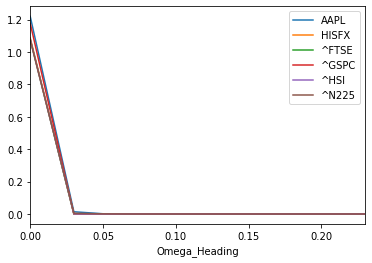

In [27]:

# calc_omega is function t create omega by asset for a given input of Threshold

def calc_omega(omega_list):
  import matplotlib
  
  F_ASSETS = []
  F_OMEGA =[]
  update_new_df = new_df
  omega_hlist = []

  for t in omega_list:
    threshold = t
    F_OMEGA.append(t) 

  #  update_new_df = new_df
    omega_assets = []
    omega_losses = []
    omega_gains = []
    omega_values = []

    for i in asset_list:
      
      update_new_df['loss_col_'+i]= update_new_df[i].apply(lambda x: float(1) if x < threshold else float(0)) * (threshold - update_new_df[i])
      update_new_df['gain_col_'+i]= update_new_df[i].apply(lambda x: float(1) if x > threshold else float(0)) * (update_new_df[i] - threshold)

      omega_assets.append(i)

      omega_losses.append(sum(update_new_df['loss_col_'+i][1:]))
      omega_gains.append(sum(update_new_df['gain_col_'+i][1:]))
      omega_values.append(omega_gains[asset_list.index(i)] / omega_losses[asset_list.index(i)])

    omega_hlist.append(omega_values)

  display(omega_hlist)
  display('              ')
  
  cdf = pd.DataFrame([omega_hlist])
 # display(cdf)
  
  
  #F_df = pd.DataFrame(columns=['my_column_name_0', 'my_column_name_1', 'my_column_name_2', 'my_column_name_3'], data=omega_hlist)
  F_df = pd.DataFrame(columns=asset_list[:], data=omega_hlist)

  F_df['Omega_Heading'] = F_OMEGA
  
  F_df.set_index('Omega_Heading', inplace=True)

  display(F_df)
  display(type(F_df), F_df.shape)
  F_df.plot()
  return   

calc_omega([0, 0.03, 0.05, 0.07, 0.23])

In [28]:
asset_list[:][0]

'AAPL'